# Flight Price Prediction### By Simhadri Mohana Kushal - 20BCE1952

In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Importing dataset
1. Since data is in form of excel file we have to use pandas read_excel to load the data.
2. After loading it is important to check null values in a column or a row
3. If it is present then following can be done,

* Filling NaN values with mean, median and mode using fillna() method
* If Less missing values, we can drop it as well

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
#importing data
df=pd.read_excel('FlightData\Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#information about the data
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
#describe about the data
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.shape

(10683, 11)

In [7]:
#finding the null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<b>We observe 2 missing values,I can directly drop these,as these are very less.<b/>

In [8]:
#drop the nullvalues
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Data Visualization

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


## Categorical Data

### Airline vs Price Analysis

([<matplotlib.patches.Wedge at 0x1db74475150>,
 [Text(0.4673382969373547, 0.9957885901212632, 'Jet Airways'),
  Text(-1.0590228682786953, 0.2974400182604306, 'IndiGo'),
  Text(-0.7301424472999118, -0.8227344691034256, 'Air India'),
  Text(0.15445010247657304, -1.0891029179306133, 'Multiple carriers'),
  Text(0.736171915795146, -0.8173438140675592, 'SpiceJet'),
  Text(0.9875298522267969, -0.48454596372369146, 'Vistara'),
  Text(1.0731359530911666, -0.24161793431596462, 'Air Asia'),
  Text(1.0972609559319872, -0.0775783126087553, 'GoAir'),
  Text(1.0999481941968114, -0.010675677176360506, 'Multiple carriers Premium economy'),
  Text(1.0999906759441507, -0.004529109838652445, 'Jet Airways Business'),
  Text(1.0999988107446137, -0.0016175167497391636, 'Vistara Premium economy'),
  Text(1.099999952439457, -0.00032347054347071794, 'Trujet')],
 [Text(0.25491179832946614, 0.5431574127934162, '36.03'),
  Text(-0.5776488372429247, 0.16224000996023485, '19.22'),
  Text(-0.39825951670904275, -0.44

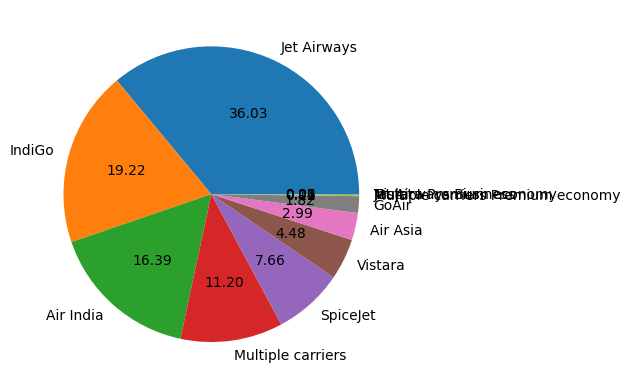

In [10]:
a = df['Airline'].value_counts()
plt.pie(a.values, labels = a.index, autopct='%.2f')

<Axes: xlabel='Airline', ylabel='Price'>

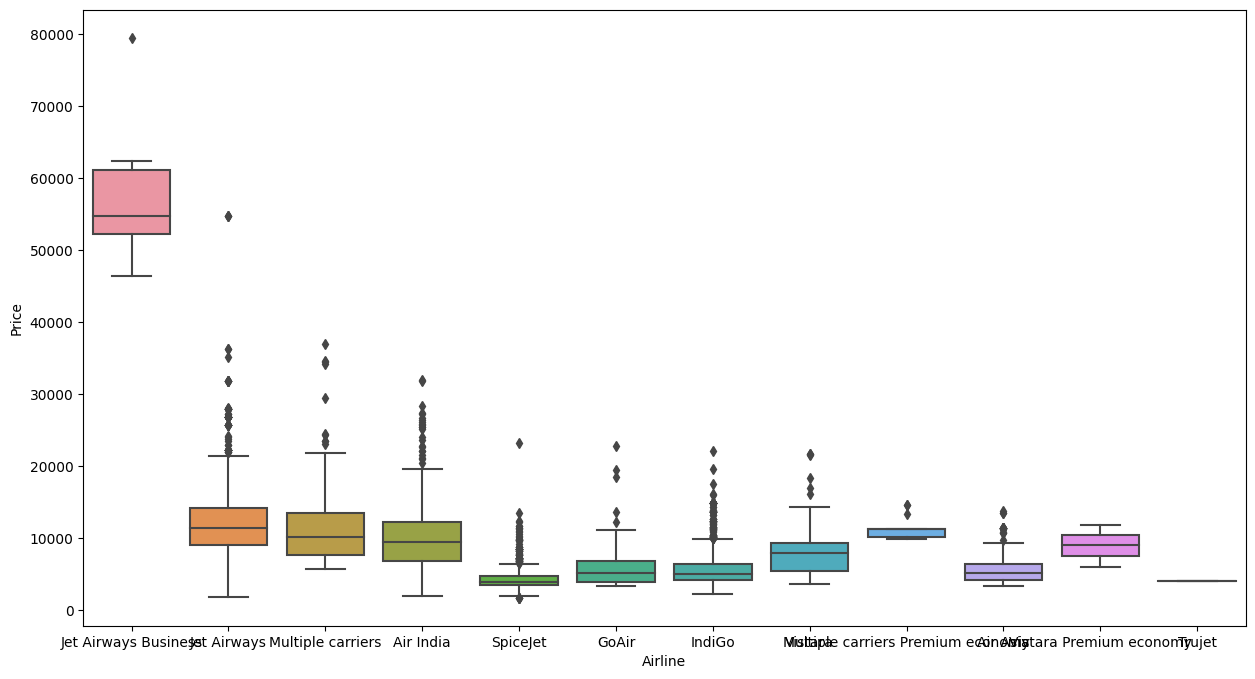

In [11]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price', data=df.sort_values('Price',ascending=False))

From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

### Perform Total_Stops vs Price Analysis

([<matplotlib.patches.Wedge at 0x1db745c7110>,
 [Text(-0.091770493524827, 1.0961652140613705, '1 stop'),
  Text(-0.404985188672844, -1.0227350570678708, 'non-stop'),
  Text(0.9786785186860542, -0.5021835890015433, '2 stops'),
  Text(1.099894913062944, -0.015204611743115735, '3 stops'),
  Text(1.0999999524137227, -0.000323558044254527, '4 stops')],
 [Text(-0.05005663283172381, 0.5979082985789292, '52.66'),
  Text(-0.22090101200336942, -0.557855485673384, '32.68'),
  Text(0.5338246465560295, -0.273918321273569, '14.23'),
  Text(0.5999426798525149, -0.008293424587154036, '0.42'),
  Text(0.5999999740438486, -0.0001764862059570147, '0.01')])

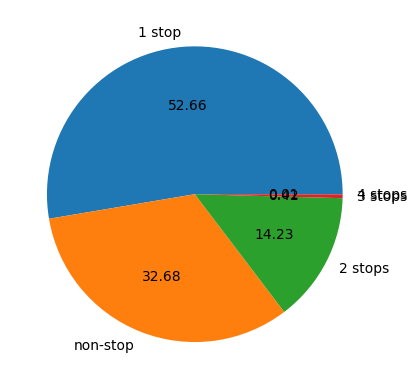

In [12]:
a = df['Total_Stops'].value_counts()
plt.pie(a.values, labels = a.index, autopct='%.2f')

<Axes: xlabel='Total_Stops', ylabel='Price'>

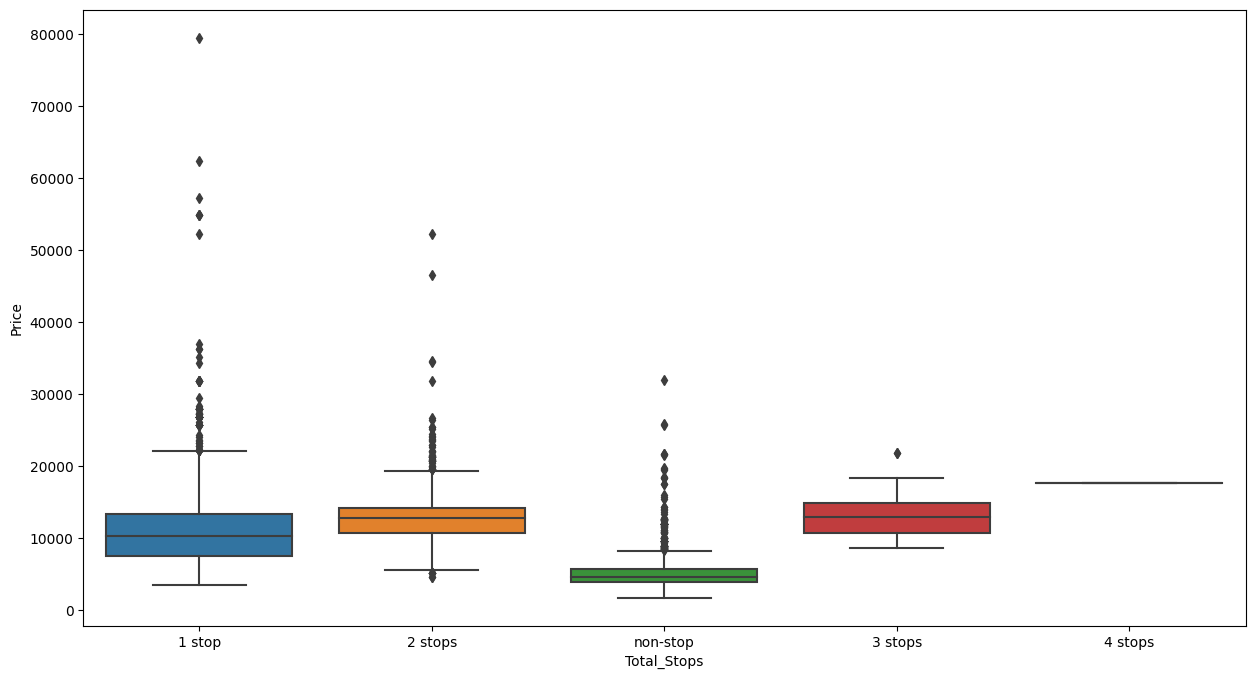

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

### Perform Source vs Price Analysis

([<matplotlib.patches.Wedge at 0x1db7478c050>,
 [Text(0.258000834752452, 1.0693154676086183, 'Delhi'),
  Text(-1.0252167974935686, -0.3986609062060528, 'Kolkata'),
  Text(0.3151506665893304, -1.0538880668023056, 'Banglore'),
  Text(1.0002773022938756, -0.45765196221111826, 'Mumbai'),
  Text(1.0931015295717597, -0.12300018718635976, 'Chennai')],
 [Text(0.14072772804679198, 0.5832629823319736, '42.46'),
  Text(-0.5592091622692192, -0.2174514033851197, '26.88'),
  Text(0.17190036359418018, -0.5748480364376212, '20.57'),
  Text(0.5456058012512048, -0.2496283430242463, '6.52'),
  Text(0.5962371979482325, -0.06709101119255986, '3.57')])

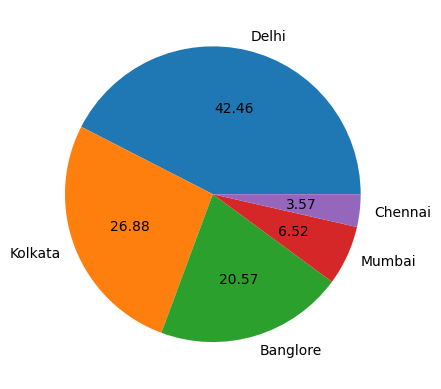

In [14]:
a = df['Source'].value_counts()
plt.pie(a.values, labels = a.index, autopct='%.2f')

<Figure size 1500x1500 with 0 Axes>

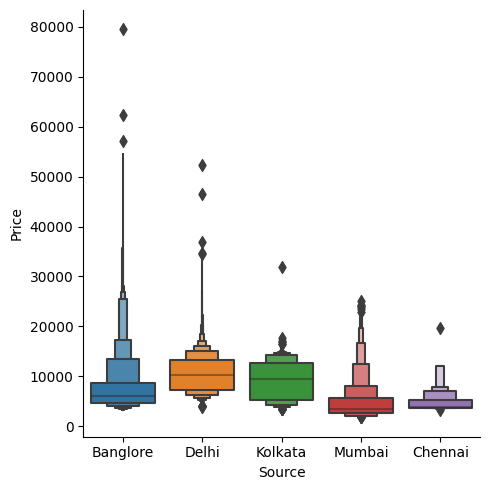

In [15]:
#Source vs Price
plt.figure(figsize=(15,15))
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')

### Perform Destination vs Price Analysis

([<matplotlib.patches.Wedge at 0x1db768c9d50>,
 [Text(0.258000834752452, 1.0693154676086183, 'Cochin'),
  Text(-1.0252167974935686, -0.3986609062060528, 'Banglore'),
  Text(0.01811582038190579, -1.09985081581635, 'Delhi'),
  Text(0.6766949505994535, -0.8672277347001787, 'New Delhi'),
  Text(1.0002772808696399, -0.4576520090374782, 'Hyderabad'),
  Text(1.093101523813704, -0.12300023835813577, 'Kolkata')],
 [Text(0.14072772804679198, 0.5832629823319736, '42.46'),
  Text(-0.5592091622692192, -0.2174514033851197, '26.88'),
  Text(0.009881356571948613, -0.5999186268089182, '11.84'),
  Text(0.36910633669061094, -0.473033309836461, '8.72'),
  Text(0.545605789565258, -0.24962836856589715, '6.52'),
  Text(0.596237194807475, -0.06709103910443769, '3.57')])

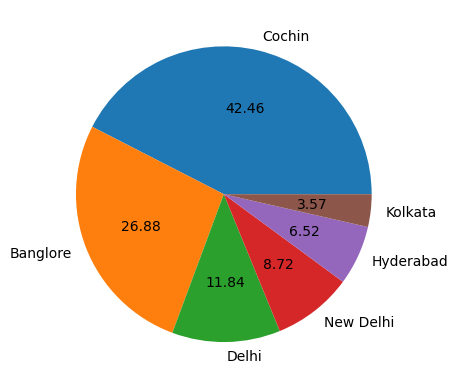

In [16]:
a = df['Destination'].value_counts()
plt.pie(a.values, labels = a.index, autopct='%.2f')

<Axes: xlabel='Destination', ylabel='Price'>

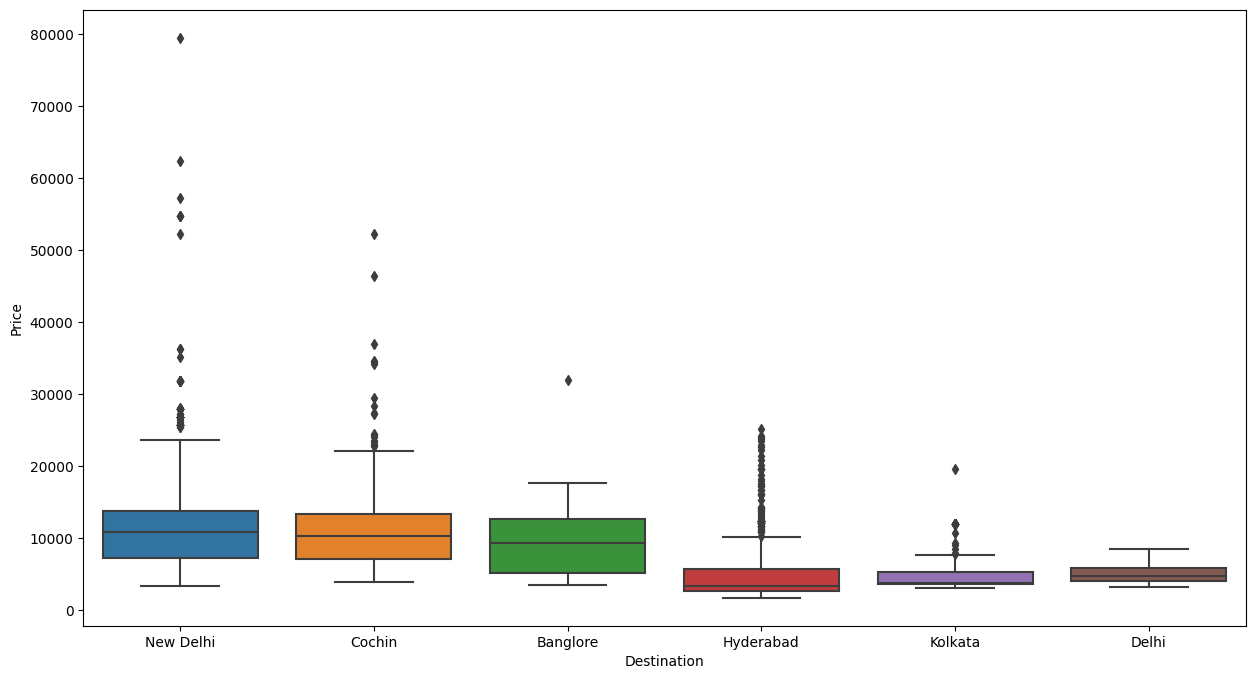

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price', data=df.sort_values('Price',ascending=False))

## Continous Data

<Axes: xlabel='Price'>

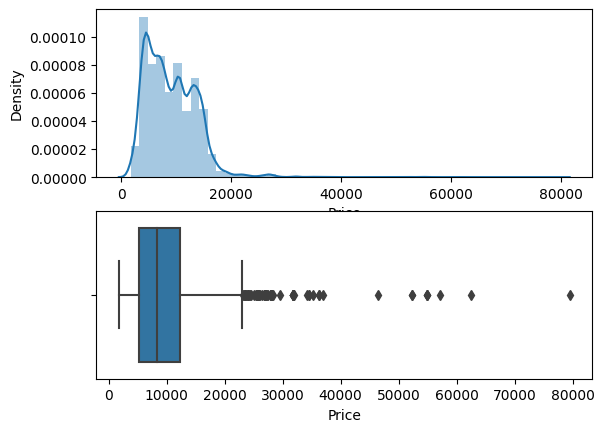

In [18]:
fig,(ax1,ax2)=plt.subplots(2,1)
sns.distplot(df['Price'],ax=ax1)
sns.boxplot(x = df['Price'],ax=ax2)

# Data Cleaning

In [19]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

The datatypes of Date_of_journey,Arrival_Time and Dep_Time is object.So,firstly we convert it into date and time for proper predicion.
* dt.day method will extract only day of that date
* dt.month method will extract only month of that date

In [20]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [21]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [22]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [23]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

Now ,we extract day and month from Date_of_journey and stored in 2 other columns.
Then there will be no use of 'Date_of_Journey' column,so we drop it.

In [24]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

In [25]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-06-30 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-30 05:50:00,2023-06-30 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-30 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-06-30 18:05:00,2023-06-30 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-06-30 16:50:00,2023-06-30 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [26]:
df.drop('Date_of_Journey', axis=1, inplace=True)

From Arrival_time and Dept_time features,we extract hour and minutes and stored in new columns and drop these columns

In [27]:
# function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [28]:
# call the function
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(df,'Dep_Time')

#extracting minutes
extract_min(df,'Dep_Time')

#drop the column
drop_col(df,'Dep_Time')

In [29]:
#extracting hour
extract_hour(df,'Arrival_Time')

#extracting min
extract_min(df,'Arrival_Time')


#drop the column
drop_col(df,'Arrival_Time')

In [30]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration

In [31]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [32]:
df['Duration']=duration
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [33]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [34]:
df['dur_hour']=df['Duration'].apply(hour)
df['dur_min']=df['Duration'].apply(minutes)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [35]:
drop_col(df,'Duration')

In [36]:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [37]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour              int32
dur_min               int32
dtype: object

### Finding the categorical value

In [38]:
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

### Finding the continuous value

In [39]:
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

## Handling categorical data
We are using two main Encoding Techniques to covert Categorical data into some numerical format 
* Nominal data -- Data that are not in any order -->one hot encoding
* ordinal data -- Data are in order --> labelEncoder

In [40]:
categorical = df[column]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [41]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [42]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [43]:
#encoding of source column
source=pd.get_dummies(categorical['Source'],drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [44]:
#encoding of destination column
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [45]:
drop_col(categorical,'Route')

In [46]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
dtype: int64

In [47]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info'], dtype='object')

In [48]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
dtype: int64

In [49]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories


In [50]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,non-stop,No info
1,Air India,Kolkata,Banglore,2 stops,No info
2,Jet Airways,Delhi,Cochin,2 stops,No info
3,IndiGo,Kolkata,Banglore,1 stop,No info
4,IndiGo,Banglore,New Delhi,1 stop,No info


In [51]:
drop_col(categorical,'Additional_Info')

In [52]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [53]:
# encoding Total stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [54]:
categorical['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [55]:
drop_col(categorical,'Source')
drop_col(categorical,'Destination')
drop_col(categorical,'Airline')

### <b>Now Our data is ready for Modeling<b/>

In [56]:
final_df=pd.concat([categorical,
                    Airline,
                    source,
                    destination,
                    df[continuous_col]],
                    axis=1)

In [57]:
final_df.head()

,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,0,1,0,0,0,0,0,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,1,0,0,0,0,0,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,0,0,0,1,0,0,0,0,0,...,0,13882,6,9,9,25,4,25,19,0
3,1,0,0,1,0,0,0,0,0,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,0,1,0,0,0,0,0,0,...,1,13302,3,1,16,50,21,35,4,45


In [58]:
pd.set_option('display.max_columns',33)
final_df.head()

,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


### Checking For Outliers

In [59]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(x = data[col],ax=ax2)

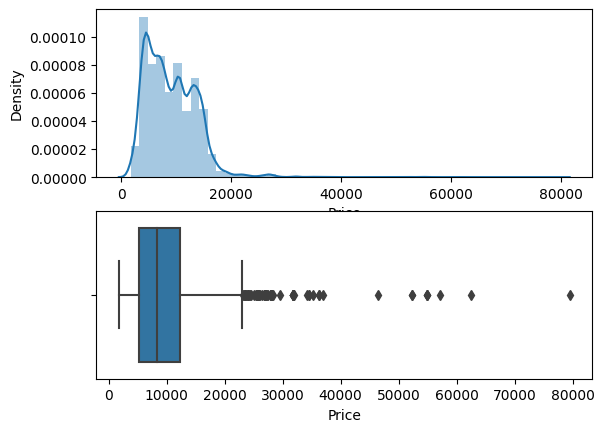

In [60]:
plot(final_df,'Price')

### Handling outliers:
As there is some outliers in price feature,so we replace it with median.

In [61]:
final_df['Price']=np.where(final_df['Price']>=40000, final_df['Price'].median(), final_df['Price'])

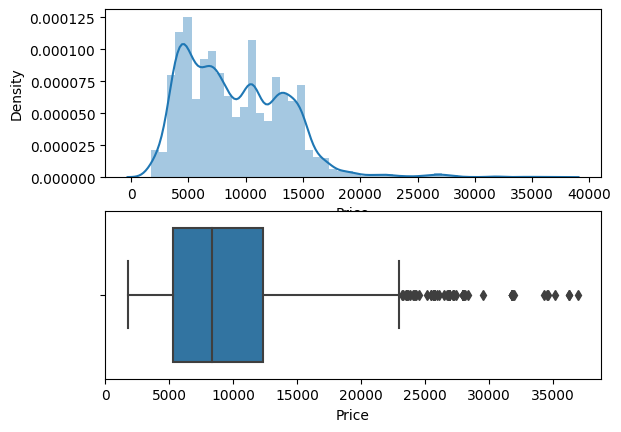

In [62]:
plot(final_df,'Price')

Seprate the dataset in X and Y columns

In [63]:
X=final_df.drop('Price',axis=1)
y=df['Price']

# Feature Selection
It is about finding the best feature and having good relation with independent variable
Issue of dimensionality reduction reduces.

For this we use mutual_info_classif

In [64]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X,y)

array([2.18173672, 0.74903813, 0.08000662, 0.68452799, 0.93531825,
       0.        , 0.42638305, 0.01638921, 0.26650693, 0.        ,
       0.22453299, 0.        , 0.14876905, 1.51663751, 0.88514679,
       0.29913022, 1.55911333, 0.38204071, 0.29242344, 0.15827646,
       0.28374133, 0.50552105, 1.06036866, 1.16492634, 0.7864351 ,
       1.18559505, 0.91146476, 0.89817688, 0.88809641])

In [65]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.145509
Air India,0.760316
GoAir,0.066744
IndiGo,0.670013
Jet Airways,0.917953
Jet Airways Business,0.000000
Multiple carriers,0.407741
Multiple carriers Premium economy,0.012522
SpiceJet,0.261739
Trujet,0.000000


In [66]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Total_Stops,2.145509
Delhi,1.555869
Cochin,1.510728
Arrival_Time_hour,1.197366
Dep_Time_hour,1.153428
journey_month,1.072411
Arrival_Time_min,0.933130
dur_min,0.919496
Jet Airways,0.917953
dur_hour,0.895147


As we can see from the table, there are several features that have approx 0 value,so we should remove it after authorizing it.But for now,we are not removing it.

# Training Models

In [67]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR

In [69]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)

Model is: SVR()
Training score: 0.00204667376020895
Predictions are: [8428.00807564 8191.73711149 8344.95896761 ... 8142.20055099 8447.30805852
 8468.5134271 ]


r2 score is: 0.014066179282161029
MAE:3427.866693098752
MSE:18984823.741662096
RMSE:4357.1577595563485


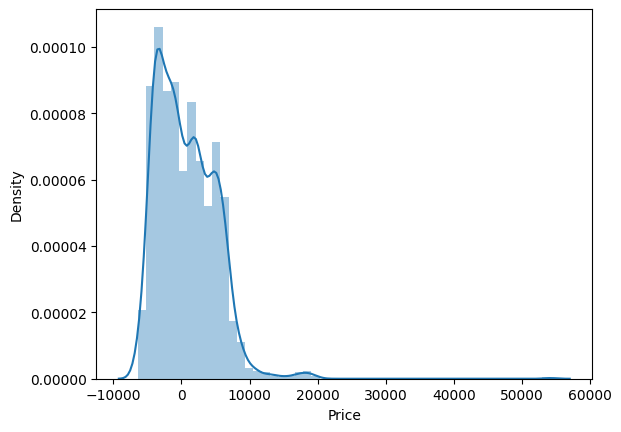

In [70]:
predict(SVR())

Model is: LogisticRegression()
Training score: 0.22527794031597426
Predictions are: [ 9899 15237 10844 ...  4226  6147 10262]


r2 score is: 0.01469367948000233
MAE:2475.799719232569
MSE:18972740.800187178
RMSE:4355.770976553655


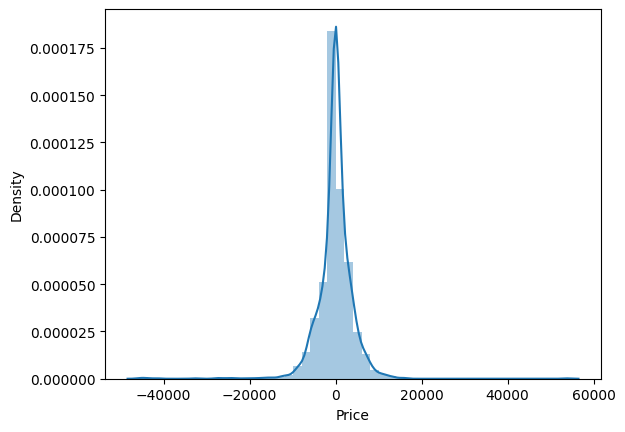

In [71]:
predict(LogisticRegression())

Model is: KNeighborsRegressor()
Training score: 0.7202136489576773
Predictions are: [ 7883.  14809.2 12933.2 ...  3197.4  9073.  11232.4]


r2 score is: 0.633702552974065
MAE:1796.0930276087972
MSE:7053305.528909686
RMSE:2655.8060036285947


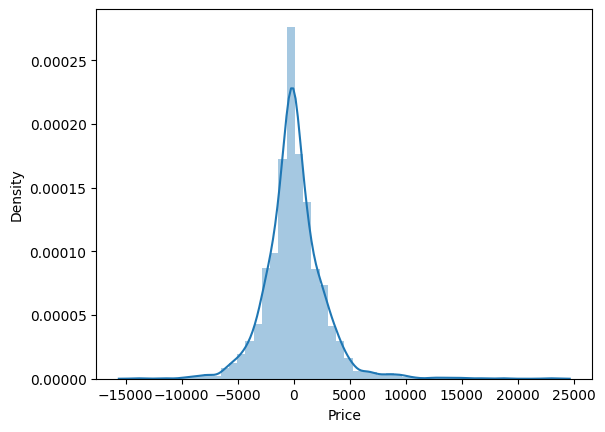

In [72]:
predict(KNeighborsRegressor())

Model is: GradientBoostingRegressor()
Training score: 0.7873989702283397
Predictions are: [ 6161.3955055  17896.36404611 11848.95121379 ...  5485.75276511
  6492.43580335 11418.94452273]


r2 score is: 0.8051803198526412
MAE:1435.7594655806215
MSE:3751384.9421573794
RMSE:1936.8492306210567


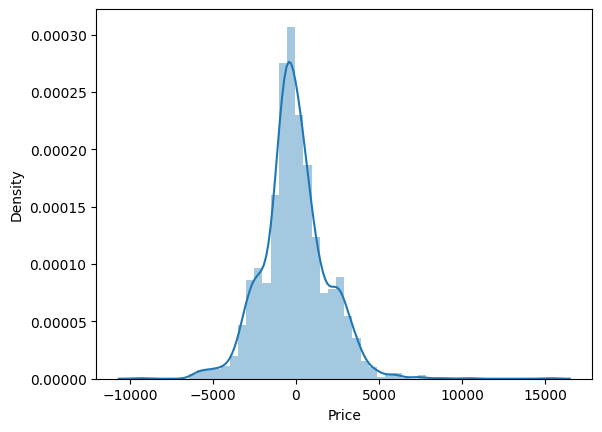

In [73]:
predict(GradientBoostingRegressor())

Model is: RandomForestRegressor()
Training score: 0.9507702733677408
Predictions are: [ 8587.834      16930.66       13947.02555556 ...  3874.19
  5640.91       10597.46333333]


r2 score is: 0.8275410492737109
MAE:1116.7942407892374
MSE:3320813.946545395
RMSE:1822.310057741381


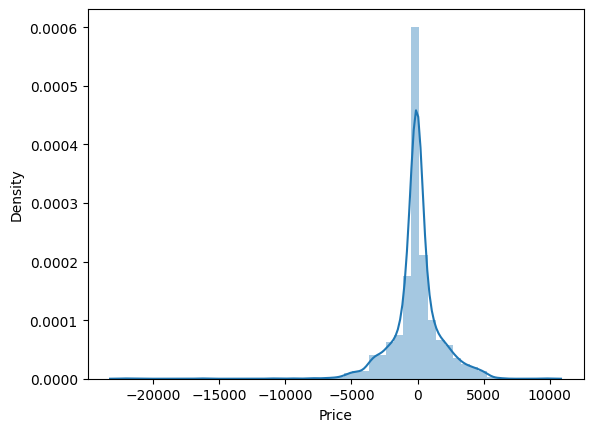

In [74]:
predict(RandomForestRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.9700475836916205
Predictions are: [ 8996. 17024. 14571. ...  3943.  5054. 10262.]


r2 score is: 0.6764529514044886
MAE:1338.0222664170956
MSE:6230117.641413846
RMSE:2496.0203607771004


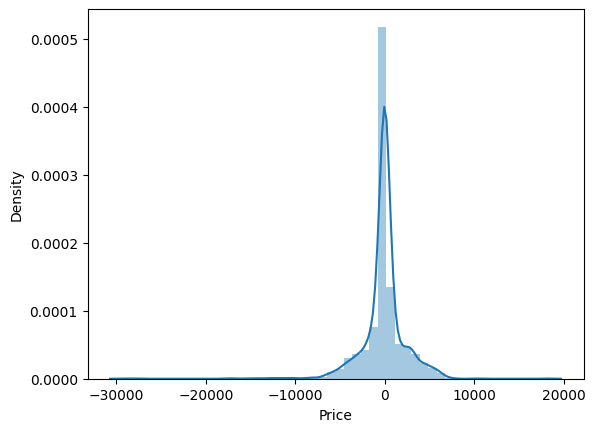

In [75]:
predict(DecisionTreeRegressor())

# Downloading Model

In [76]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [77]:
predictions = model.predict(X_test)
predictions

array([ 8996., 18550., 14571., ...,  3943.,  5054., 10262.])

In [78]:
r2score=r2_score(y_test,predictions) 
print("r2 score is: {}".format(r2score))
          
print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))

r2 score is: 0.686552486102745
MAE:1334.2976524723133
MSE:6035644.257815343
RMSE:2456.7548224874504


In [79]:
import pickle
pickle.dump(model,open("model.pkl","wb"))